# Chapter 11: Neural nets (NN) (Edited by Kang)


> (c) 2019-2020 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.
>
> Date: 2020-03-08
>
> Python Version: 3.8.2
> Jupyter Notebook Version: 5.6.1
>
> Packages:
>   - dmba: 0.0.12
>   - matplotlib: 3.2.0
>   - numpy: 1.18.1
>   - pandas: 1.0.1
>   - scikit-learn: 0.22.2
>
> The assistance from Mr. Kuber Deokar and Ms. Anuja Kulkarni in preparing these solutions is gratefully acknowledged.


In [1]:
# Import required packages for this chapter
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor

import matplotlib.pylab as plt

from dmba import regressionSummary

%matplotlib inline

no display found. Using non-interactive Agg backend


In [2]:
# Working directory:
#
# We assume that data are kept in the same directory as the notebook. If you keep your 
# data in a different folder, replace the argument of the `Path`
DATA = Path('.')
# and then load data using 
#
# pd.read_csv(DATA / ‘filename.csv’)

# Problem 11.3: Car Sales.

Consider the data on used cars (_ToyotaCorolla.csv_) with 1436 records and details on 38 attributes, including Price, Age, KM, HP, and other specifcations. The goal is to predict the price of a used Toyota Corolla based on its specifcations.

__11.3.a.__ Fit a neural network model to the data. Use a single hidden layer with 2 nodes.

• Use predictors Age_08_04, KM, Fuel_Type, HP, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, and Tow_Bar.

• Use the scikit-learn transformer _MinMaxScaler()_ to scale the data to the range [0, 1]. Use separate transformer for the input and output data. To create the dummy variables, use the pandas function _pd.get_dummies()_.

Record the RMS error for the training data and the validation data. Repeat the process, changing the number of hidden layers and nodes to {single layer with 5 nodes}, {two layers, 5 nodes in each layer}.

## Data Preprocessing

In [3]:
# load the data
car_df = pd.read_csv('ToyotaCorolla.csv')
# select the suggested variables
selected_var = ['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax', 
                'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 
                'Powered_Windows', 'Sport_Model', 'Tow_Bar']
car_df = car_df[selected_var]

In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             1436 non-null   int64 
 1   Age_08_04         1436 non-null   int64 
 2   KM                1436 non-null   int64 
 3   Fuel_Type         1436 non-null   object
 4   HP                1436 non-null   int64 
 5   Automatic         1436 non-null   int64 
 6   Doors             1436 non-null   int64 
 7   Quarterly_Tax     1436 non-null   int64 
 8   Mfr_Guarantee     1436 non-null   int64 
 9   Guarantee_Period  1436 non-null   int64 
 10  Airco             1436 non-null   int64 
 11  Automatic_airco   1436 non-null   int64 
 12  CD_Player         1436 non-null   int64 
 13  Powered_Windows   1436 non-null   int64 
 14  Sport_Model       1436 non-null   int64 
 15  Tow_Bar           1436 non-null   int64 
dtypes: int64(15), object(1)
memory usage: 179.6+ KB


In [5]:
# convert the categorical data into dummy variables
categorical_var = ['Fuel_Type']
car_df = pd.get_dummies(car_df, columns=['Fuel_Type'], drop_first=True)


In [6]:
# separate out predictors and response variables
X_df = car_df.drop(columns=["Price"])
Y_df = car_df[ ["Price"] ]

In [7]:
# normalize the data 
scaleInput = MinMaxScaler()
scaleOutput = MinMaxScaler()
X = scaleInput.fit_transform(X_df)
y = scaleOutput.fit_transform(Y_df)

In [8]:
# partition data

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.4, random_state = 12345)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((861, 16), (575, 16), (861, 1), (575, 1))

__9.3.a.i.__ What happens to the RMS error for the training data as the number of layers and nodes increases?

### Single layer with 2 nodes

In [9]:
help(MLPRegressor)

Help on class MLPRegressor in module sklearn.neural_network._multilayer_perceptron:

class MLPRegressor(sklearn.base.RegressorMixin, BaseMultilayerPerceptron)
 |  MLPRegressor(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |  
 |  Multi-layer Perceptron regressor.
 |  
 |  This model optimizes the squared-loss using LBFGS or stochastic gradient
 |  descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity', 'logist

In [10]:
# train neural network with 2 hidden nodes
car_nnet = MLPRegressor(hidden_layer_sizes=(2),activation='logistic',  solver='lbfgs', random_state=1)
car_nnet.fit(X_train, y_train.ravel())

MLPRegressor(activation='logistic', hidden_layer_sizes=2, random_state=1,
             solver='lbfgs')

Training data (2)

Regression statistics

                      Mean Error (ME) : 1.4720
       Root Mean Squared Error (RMSE) : 1067.2968
            Mean Absolute Error (MAE) : 798.5035
          Mean Percentage Error (MPE) : 0.0232
Mean Absolute Percentage Error (MAPE) : 7.7100

Validation data (2)

Regression statistics

                      Mean Error (ME) : -76.9962
       Root Mean Squared Error (RMSE) : 1134.6333
            Mean Absolute Error (MAE) : 851.7910
          Mean Percentage Error (MPE) : -0.9009
Mean Absolute Percentage Error (MAPE) : 8.3696


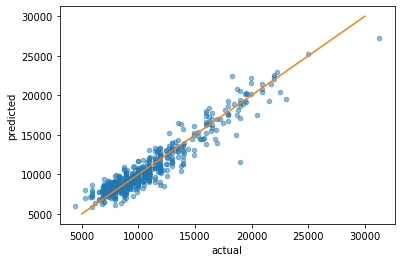

In [11]:
# RMSE for training set
print('Training data (2)')
y_actual = scaleOutput.inverse_transform(y_train).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_train)]).ravel()
regressionSummary(y_pred, y_actual)

# RMSE for validation set
print('\nValidation data (2)')
y_actual = scaleOutput.inverse_transform(y_valid).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_valid)]).ravel()
regressionSummary(y_pred, y_actual)

# plot predicted vs actual values
ax = pd.DataFrame({'actual': y_actual, 'predicted': y_pred}).plot.scatter(x='actual', y='predicted', alpha=0.5)
plt.plot([5000, 30000], [5000, 30000], color='C1')
plt.show()

### Single layer with 5 nodes

Training data (5)

Regression statistics

                      Mean Error (ME) : -152.6040
       Root Mean Squared Error (RMSE) : 2078.2996
            Mean Absolute Error (MAE) : 1528.0621
          Mean Percentage Error (MPE) : -4.1615
Mean Absolute Percentage Error (MAPE) : 16.3972

Validation data (5)

Regression statistics

                      Mean Error (ME) : -344.3362
       Root Mean Squared Error (RMSE) : 2179.0640
            Mean Absolute Error (MAE) : 1641.5777
          Mean Percentage Error (MPE) : -6.2265
Mean Absolute Percentage Error (MAPE) : 17.4602


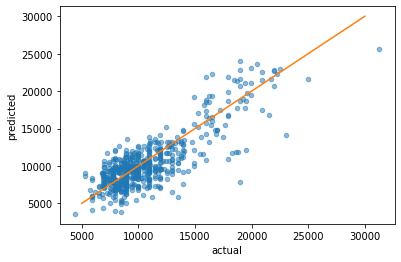

In [12]:
# train neural network with 5 hidden nodes
car_nnet = MLPRegressor(hidden_layer_sizes=(5))
car_nnet.fit(X_train, y_train.ravel())

# RMSE for training set
print('Training data (5)')
y_actual = scaleOutput.inverse_transform(y_train).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_train)]).ravel()
regressionSummary(y_pred, y_actual)

# RMSE for validation set
print('\nValidation data (5)')
y_actual = scaleOutput.inverse_transform(y_valid).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_valid)]).ravel()
regressionSummary(y_pred, y_actual)

# plot predicted vs actual values
ax = pd.DataFrame({'actual': y_actual, 'predicted': y_pred}).plot.scatter(x='actual', y='predicted', alpha=0.5)
plt.plot([5000, 30000], [5000, 30000], color='C1')
plt.show()

### Two layer with 5 nodes each

Training data (5, 5)

Regression statistics

                      Mean Error (ME) : -1.8479
       Root Mean Squared Error (RMSE) : 1084.1496
            Mean Absolute Error (MAE) : 805.5292
          Mean Percentage Error (MPE) : 0.0392
Mean Absolute Percentage Error (MAPE) : 7.7653

Validation data (5, 5)

Regression statistics

                      Mean Error (ME) : -85.3521
       Root Mean Squared Error (RMSE) : 1146.3725
            Mean Absolute Error (MAE) : 866.8625
          Mean Percentage Error (MPE) : -0.9074
Mean Absolute Percentage Error (MAPE) : 8.4989


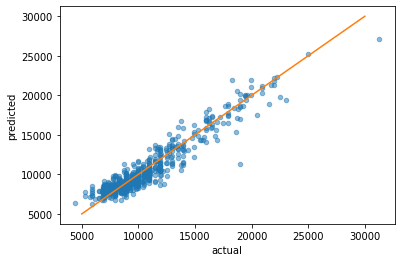

In [13]:
# train neural network with 2 layes with 5 hidden nodes each

car_nnet = MLPRegressor(hidden_layer_sizes=(5, 5),activation='logistic',  solver='lbfgs', random_state=1)
car_nnet.fit(X_train, y_train.ravel())


# RMSE for training set
print('Training data (5, 5)')
y_actual = scaleOutput.inverse_transform(y_train).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_train)]).ravel()
regressionSummary(y_pred, y_actual)

# RMSE for validation set
print('\nValidation data (5, 5)')
y_actual = scaleOutput.inverse_transform(y_valid).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_valid)]).ravel()
regressionSummary(y_pred, y_actual)

# plot predicted vs actual values
ax = pd.DataFrame({'actual': y_actual, 'predicted': y_pred}).plot.scatter(x='actual', y='predicted', alpha=0.5)
plt.plot([5000, 30000], [5000, 30000], color='C1')
plt.show()

ii. What happens to the RMS error for the validation data?

iii. Comment on the appropriate number of layers and nodes for this application

Use the decision tree model to predcit the price. Is the model is better than the chosen neural network model?

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
help(DecisionTreeRegressor)

Help on class DecisionTreeRegressor in module sklearn.tree._classes:

class DecisionTreeRegressor(sklearn.base.RegressorMixin, BaseDecisionTree)
 |  DecisionTreeRegressor(*, criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree regressor.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"mse", "friedman_mse", "mae"}, default="mse"
 |      The function to measure the quality of a split. Supported criteria
 |      are "mse" for the mean squared error, which is equal to variance
 |      reduction as feature selection criterion and minimizes the L2 loss
 |      using the mean of each terminal node, "friedman_mse", which uses mean
 |      squared error with Friedman's improvement score for potential s

In [20]:
dt = DecisionTreeRegressor(max_depth=5)

In [21]:
model = dt.fit(X_train, y_train.ravel())

Training data (5, 5)

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1013.4514
            Mean Absolute Error (MAE) : 792.3785
          Mean Percentage Error (MPE) : -0.0000
Mean Absolute Percentage Error (MAPE) : 7.8138

Validation data (5, 5)

Regression statistics

                      Mean Error (ME) : -76.5073
       Root Mean Squared Error (RMSE) : 1400.1841
            Mean Absolute Error (MAE) : 1018.7527
          Mean Percentage Error (MPE) : -1.0452
Mean Absolute Percentage Error (MAPE) : 10.0640


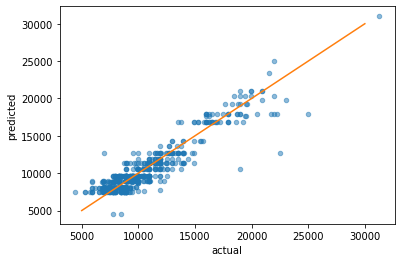

In [22]:
# RMSE for training set
print('Training data (5, 5)')
y_actual = scaleOutput.inverse_transform(y_train).ravel()
y_pred = scaleOutput.inverse_transform([model.predict(X_train)]).ravel()
regressionSummary(y_pred, y_actual)

# RMSE for validation set
print('\nValidation data (5, 5)')
y_actual = scaleOutput.inverse_transform(y_valid).ravel()
y_pred = scaleOutput.inverse_transform([model.predict(X_valid)]).ravel()
regressionSummary(y_pred, y_actual)

# plot predicted vs actual values
ax = pd.DataFrame({'actual': y_actual, 'predicted': y_pred}).plot.scatter(x='actual', y='predicted', alpha=0.5)
plt.plot([5000, 30000], [5000, 30000], color='C1')
plt.show()